# Análise de Missões Espaciais ao Longo dos Anos

Nesta análise, exploraremos relatórios detalhados de missões espaciais realizadas ao longo dos anos. O objetivo é extrair insights valiosos que possam fornecer uma compreensão mais profunda das conquistas, desafios e tendências no campo das explorações espaciais. Através da análise de dados meticulosa, buscamos revelar padrões e informações significativas que contribuam para o entendimento do progresso e da evolução das missões espaciais. Vamos embarcar nessa jornada de descobertas e análises para ampliar nosso conhecimento sobre as atividades espaciais.


# Pré-processamento de Dados

Antes de começarmos a análise propriamente dita, é crucial realizar o pré-processamento dos dados. Este passo é essencial para garantir que os dados estejam limpos, organizados e prontos para serem explorados.

In [60]:
'''
antes de tudo, vamos fazer um tratamento nos dados da planilha, retirar tudo que não vamos iniciar, para posteriormente começar a responder.
nome da planilha é space_missions1.csv, vamos puxar ela para tratar os dados. então vamos começar importando as bibliotecas necessarias nesse projeto
para ler os dados da planilha, vamos usar a biblioteca pandas, e para fazer os graficos, vamos usar a biblioteca matplotlib.pyplot
'''
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv('space_missions1.csv') #vamos ler a planilha e atribuir a variavel tabela
display(tabela) #vamos mostrar a tabela para ver como ela está

tabela.info() #vamos ver as informações da tabela, para ver se temos dados faltantes

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,NaN,VLS-1,0,Retired,NaN,SCD-2A
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,1899-12-30 19:40:00,VLS-1,0,Retired,NaN,SACI-2
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,NaN,VLS-1,0,Retired,NaN,"SATEC, UNOSAT"
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,NaN,Redstone Sparta,1,Retired,NaN,WRESAT
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 03:48:00,Juno I,1,Retired,NaN,Explorer 1
...,...,...,...,...,...,...,...,...,...
4621,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2001,1899-12-30 04:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2383
4622,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2004,1899-12-30 06:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2405
4623,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2006,1899-12-30 04:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2421
4624,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991,1899-12-30 03:54:00,Tsyklon-3,1,Retired,NaN,Intercosmos 25 & Magion 3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4626 non-null   object 
 1   Location       4626 non-null   object 
 2   Year           4626 non-null   int64  
 3   Time           4501 non-null   object 
 4   Rocket         4626 non-null   object 
 5   MissionStatus  4626 non-null   int64  
 6   RocketStatus   4626 non-null   object 
 7   Price          1264 non-null   float64
 8   Mission        4626 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 325.4+ KB


In [61]:
#analisando melhor a tabela, já vejo que vamos excluir algumas colunas que são desnecessarias para responder as perguntas.
#vamos remover a coluna (Time	Rocket	MissionStatus	RocketStatus	Price	Mission)

tabela = tabela.drop(['Time', 'Rocket', 'MissionStatus', 'RocketStatus', 'Price', 'Mission'], axis=1) #vamos remover as colunas que não vamos usar
display(tabela) #vamos mostrar a tabela para ver como ela está

tabela.info() #vamos ver as informações da tabela, para ver se temos dados faltantes

,Company,Location,Year
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958
...,...,...,...
4621,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2001
4622,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2004
4623,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2006
4624,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Company   4626 non-null   object
 1   Location  4626 non-null   object
 2   Year      4626 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 108.6+ KB


## Pergunta 1: Quantas vezes cada empresa levou foguetes para o espaço?

Nesta análise, buscaremos determinar a frequência com que cada empresa realizou lançamentos espaciais. Queremos entender a distribuição dos esforços entre as diferentes organizações no contexto das missões espaciais.


Company
RVSN USSR           1777
CASC                 337
Arianespace          293
General Dynamics     251
VKS RF               215
                    ... 
GK LS                  1
Firefly                1
EER                    1
Douglas                1
CAS Space              1
Name: count, Length: 62, dtype: int64

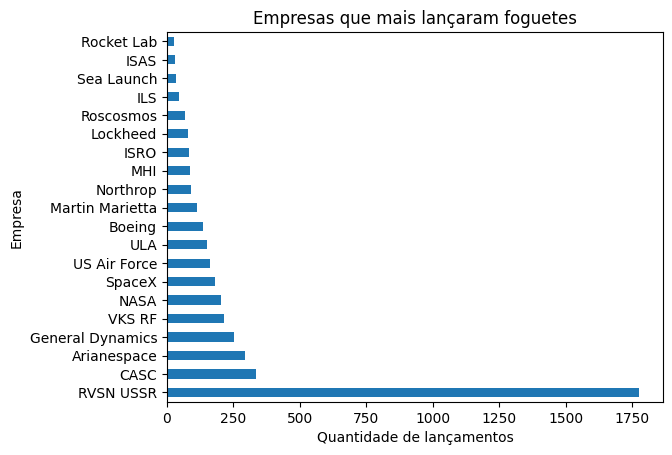

In [62]:
#agora para responder a pergunta acima, vamos agrupar os dados por Company, e ver quantas vezes cada uma aparece

tabela['Company'].value_counts() #vamos agrupar os dados por Company, e ver quantas vezes cada uma aparece

display(tabela['Company'].value_counts()) #vamos mostrar a tabela para ver como ela está

#vamos criar um grafico de barras na horizontal, e mostrar apenas as 20 primeiras empresas que mais lançaram foguetes

tabela['Company'].value_counts().head(20).plot.barh() #vamos criar um grafico de barras na horizontal, e mostrar apenas as 20 primeiras empresas que mais lançaram foguetes
plt.title('Empresas que mais lançaram foguetes') #vamos colocar um titulo no grafico
plt.xlabel('Quantidade de lançamentos') #vamos colocar um nome no eixo x
plt.ylabel('Empresa') #vamos colocar um nome no eixo y
plt.show() #vamos mostrar o grafico

"RVSN" refere-se ao termo russo "Raketnye Voyska Strategicheskogo Naznacheniya" (em russo: Ракетные войска стратегического назначения), que em português significa "Forças de Mísseis Estratégicos". Essa designação está associada às forças militares responsáveis pelos mísseis balísticos estratégicos na Rússia.

A "USSR" é a sigla em inglês para a "União das Repúblicas Socialistas Soviéticas", que foi um país que existiu até o seu colapso em 1991. Antes do colapso, a União Soviética (URSS) era uma potência espacial significativa e desempenhou um papel importante nas primeiras conquistas espaciais, como o lançamento do primeiro satélite artificial, o Sputnik 1, em 1957, e o envio do primeiro ser humano ao espaço, Yuri Gagarin, em 1961.

## Pergunta 2: Quantos lançamentos de foguetes já ocorreram ao longo da história?

Vamos investigar o número total de lançamentos de foguetes desde o início das atividades espaciais. Esta análise visa proporcionar uma visão abrangente do volume de atividades espaciais registradas ao longo dos anos.


Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2018    117
2019    109
2020    119
2021    157
2022     93
Name: count, Length: 66, dtype: int64

O total de lançamentos de todos os anos é: 4626


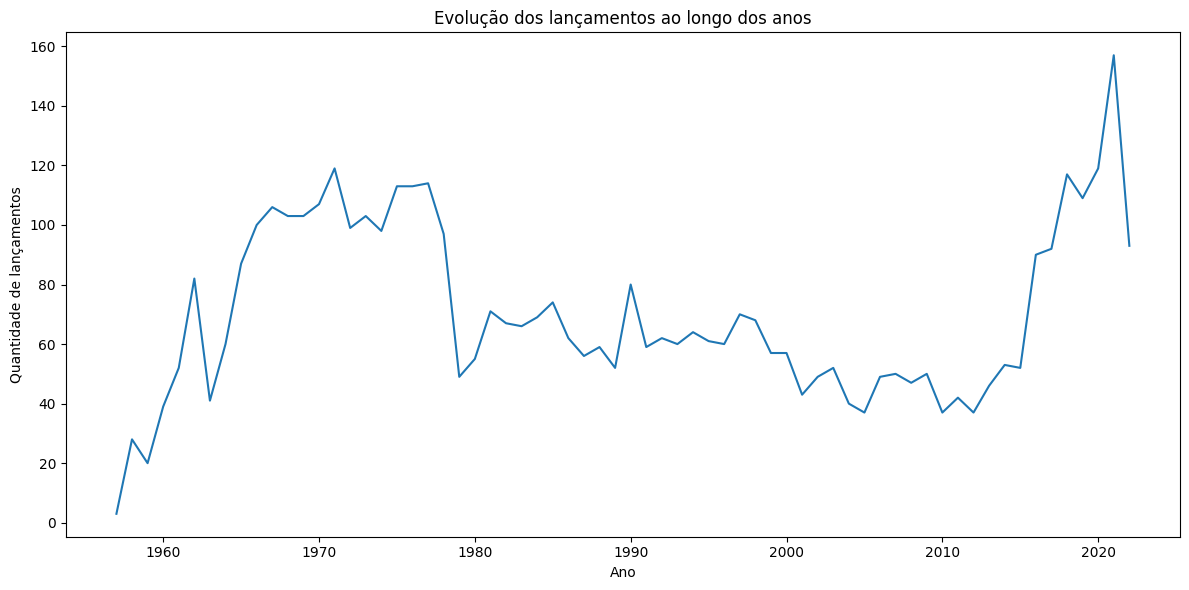

In [63]:
# vamos somar quanto cada vez que um ano aparece na tabela
total_lancamentos = tabela['Year'].value_counts().sum() #vamos somar quanto cada vez que um ano aparece na tabela
total_lancamentos

#agora vamos criar um grafico de linha para mostrar a evolução dos lançamentos ao longo dos anos

# vamos somar quantas vezes cada ano aparece na tabela
total_lancamentos = tabela['Year'].value_counts().sort_index()

# criar a figura e os subplots
fig, ax1 = plt.subplots(figsize=(12,6))

# plotar o gráfico de linha no primeiro subplot
total_lancamentos.plot(kind='line', ax=ax1)
ax1.set_title('Evolução dos lançamentos ao longo dos anos')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de lançamentos')

# ajustar o layout para ocupar todo o espaço disponível
plt.tight_layout()

display(total_lancamentos) #vamos mostrar a tabela para ver como ela está
total = total_lancamentos.sum()
print(f"\033[1;32mO total de lançamentos de todos os anos é: {total}\033[0m")

# exibir o gráfico
plt.show()


## Pergunta 3: Quais são as principais empresas que realizaram os lançamentos? (Ranking)

Nesta análise, pretendemos identificar e classificar as principais empresas responsáveis pelos lançamentos espaciais. Queremos entender a liderança e contribuição relativa de cada empresa para as atividades espaciais.


Company
RVSN USSR           1777
CASC                 337
Arianespace          293
General Dynamics     251
VKS RF               215
                    ... 
GK LS                  1
Firefly                1
EER                    1
Douglas                1
CAS Space              1
Name: count, Length: 62, dtype: int64

Company
RVSN USSR           1777
CASC                 337
Arianespace          293
General Dynamics     251
VKS RF               215
NASA                 203
SpaceX               182
US Air Force         161
ULA                  151
Boeing               136
Martin Marietta      114
Northrop              89
MHI                   87
ISRO                  82
Lockheed              79
Name: count, dtype: int64

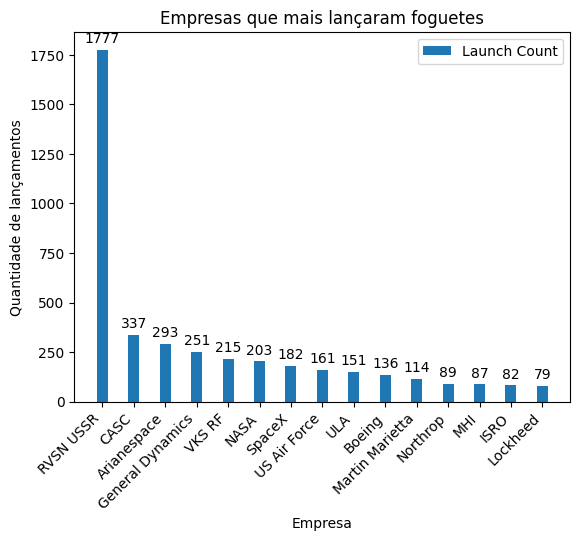

In [64]:
import numpy as np
#agora vamos responder a pergunta 3, vamos ver quantos lançamentos foram feitos por cada empresa
#podemos fazer um ranking das empresas que mais lançaram foguetes, e ver quantos lançamentos cada uma fez

#vamos agrupar os dados por Company, e ver quantas vezes cada uma aparece
tabela['Company'].value_counts()
display(tabela['Company'].value_counts()) #vamos mostrar a tabela para ver como ela está

#vamos retirar agora as 15 primeiras empresas que mais lançaram foguetes
tabela['Company'].value_counts().head(15)
display(tabela['Company'].value_counts().head(15)) #vamos mostrar a tabela para ver como ela está

# Get the top 15 companies with the most rocket launches
top_companies = tabela['Company'].value_counts().head(15)

# Create a list of company names and their corresponding launch counts
companies = top_companies.index.tolist()
launch_counts = top_companies.values.tolist()

# Set the position of the bars on the x-axis
x = np.arange(len(companies))

# Set the width of the bars
width = 0.35

# Create the grouped bar chart
fig, ax = plt.subplots()
rects = ax.bar(x, launch_counts, width, label='Launch Count')

# Add labels, title, and axis labels
ax.set_ylabel('Quantidade de lançamentos')
ax.set_xlabel('Empresa')
ax.set_title('Empresas que mais lançaram foguetes')
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=45, ha='right')
ax.legend()

# Add labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

## Pergunta 4: Qual foi o ano com o maior número de lançamentos de foguetes?

Vamos examinar os dados para determinar qual ano registrou o maior volume de atividades de lançamento espacial. Essa análise nos ajudará a identificar períodos de intensa atividade na exploração espacial.


Year
2021    157
1971    119
2020    119
2018    117
1977    114
       ... 
2005     37
2010     37
1958     28
1959     20
1957      3
Name: count, Length: 66, dtype: int64

Year
2021    157
1971    119
2020    119
2018    117
1977    114
1975    113
1976    113
2019    109
1970    107
1967    106
Name: count, dtype: int64

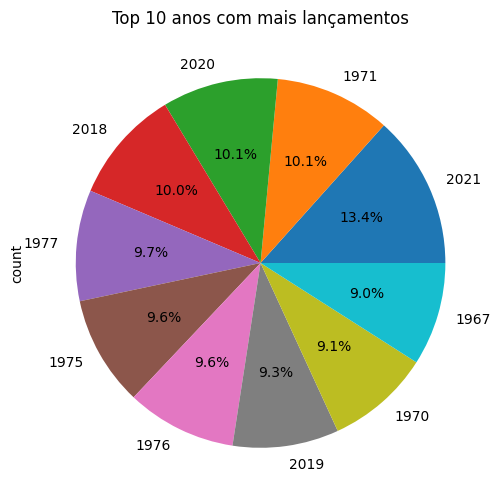

In [65]:
#agora vamos responder a pergunta 4, veremos quais os anos que tiveram os maiores picos de lançamentos de foguetes.
#vamos pegar os 10 anos que mais tiveram lançamentos de foguetes.

#vamos agrupar os dados por Year, e ver quantas vezes cada uma aparece
tabela['Year'].value_counts()
display(tabela['Year'].value_counts()) #vamos mostrar a tabela para ver como ela está

#vamos pegar os 10 anos que mais tiveram lançamentos de foguetes.
tabela['Year'].value_counts().head(10)
display(tabela['Year'].value_counts().head(10)) #vamos mostrar a tabela para ver como ela está

#vamos fazer um grafico de pizza para mostrar os 10 anos que mais tiveram lançamentos de foguetes.

# Seleciona os 10 anos que mais tiveram lançamentos
top_years = tabela['Year'].value_counts().head(10)

# Cria o gráfico de pizza
top_years.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')

# Adiciona um título ao gráfico
plt.title('Top 10 anos com mais lançamentos')

# Exibe o gráfico
plt.show()



## Pergunta 5: Quais são os locais que mais tiveram lançamentos de foguetes?

Esta análise visa identificar os locais geográficos que se destacam em termos de frequência de lançamentos espaciais. Queremos entender as regiões que foram mais ativas nas atividades de exploração espacial.


Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan      251
Site 132/1, Plesetsk Cosmodrome, Russia         216
Site 43/4, Plesetsk Cosmodrome, Russia          211
Site 41/1, Plesetsk Cosmodrome, Russia          198
Site 1/5, Baikonur Cosmodrome, Kazakhstan       193
                                               ... 
Launch Plateform, Shahrud Missile Test Site       1
Site 131/29, Baikonur Cosmodrome, Kazakhstan      1
Site 250, Baikonur Cosmodrome, Kazakhstan         1
LP-41, Kauai, Pacific Missile Range Facility      1
Pad A, Boca Chica, Texas, USA                     1
Name: count, Length: 158, dtype: int64

Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan           251
Site 132/1, Plesetsk Cosmodrome, Russia              216
Site 43/4, Plesetsk Cosmodrome, Russia               211
Site 41/1, Plesetsk Cosmodrome, Russia               198
Site 1/5, Baikonur Cosmodrome, Kazakhstan            193
Site 132/2, Plesetsk Cosmodrome, Russia              174
Site 133/3, Plesetsk Cosmodrome, Russia              158
LC-39A, Kennedy Space Center, Florida, USA           149
Site 43/3, Plesetsk Cosmodrome, Russia               141
ELA-2, Guiana Space Centre, French Guiana, France    118
ELA-3, Guiana Space Centre, French Guiana, France    114
SLC-40, Cape Canaveral AFS, Florida, USA             111
SLC-41, Cape Canaveral AFS, Florida, USA              97
SLC-4W, Vandenberg AFB, California, USA               93
SLC-4E, Vandenberg AFB, California, USA               83
SLC-17A, Cape Canaveral AFS, Florida, USA             80
LA-Y1, Tanegashima Space Center, Japan                76
SLC-36B, Cape Canavera

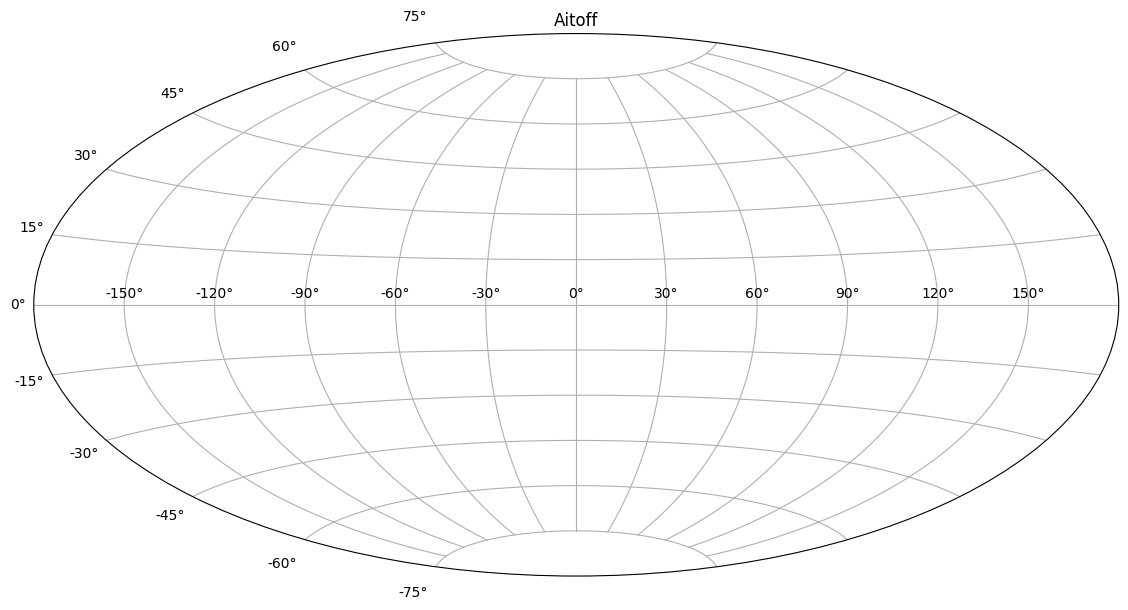

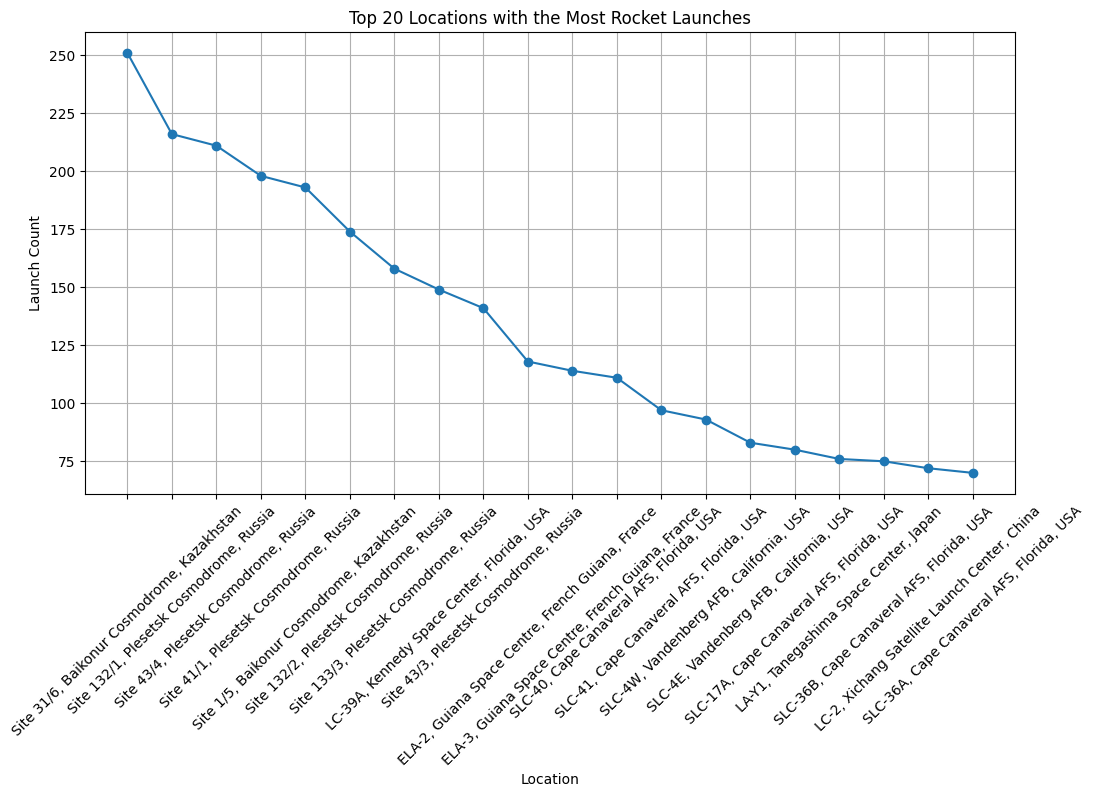

In [66]:
#vamos responder a pergunta 5, vamos ver quais foram os locais que mais tiveram lançamentos de foguetes.
#vamos pegar os 20 locais que mais tiveram lançamentos de foguetes.

#vamos agrupar os dados por Location, e ver quantas vezes cada uma aparece
tabela['Location'].value_counts()
display(tabela['Location'].value_counts()) #vamos mostrar a tabela para ver como ela está

#vamos pegar os 20 locais que mais tiveram lançamentos de foguetes.
tabela['Location'].value_counts().head(20)
display(tabela['Location'].value_counts().head(20)) #vamos mostrar a tabela para ver como ela está

#vamos fazer um grafico geographics para mostrar os 20 locais que mais tiveram lançamentos de foguetes.

plt.figure(figsize=(14, 8))
plt.subplot(projection="aitoff")
plt.title("Aitoff")
plt.grid(True)
plt.show()

#vamos fazer um grafico de linha para mostrar os 20 locais que mais tiveram lançamentos de foguetes.

# Get the top 20 locations with the most rocket launches
top_locations = tabela['Location'].value_counts().head(20)

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(top_locations.index, top_locations.values, marker='o')
plt.title('Top 20 Locations with the Most Rocket Launches')
plt.xlabel('Location')
plt.ylabel('Launch Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Resumo da Análise

O código em questão está analisando dados de lançamentos de foguetes. O objetivo principal é identificar os 20 locais que tiveram o maior número de lançamentos de foguetes.

Primeiro, os dados são agrupados por localização (Location), e a frequência de cada localização é calculada usando o método value_counts(). Isso fornece uma contagem de quantas vezes cada localização aparece nos dados, que é uma indicação do número de lançamentos de foguetes que ocorreram em cada local.

Em seguida, os 20 locais com o maior número de lançamentos de foguetes são selecionados usando o método head(20). Esses dados são exibidos para o usuário.

Resumo do Código
O código em questão está analisando dados de lançamentos de foguetes. O objetivo principal é identificar os 20 locais que tiveram o maior número de lançamentos de foguetes.

Primeiro, os dados são agrupados por localização (Location), e a frequência de cada localização é calculada usando o método value_counts(). Isso fornece uma contagem de quantas vezes cada localização aparece nos dados, que é uma indicação do número de lançamentos de foguetes que ocorreram em cada local.

Em seguida, os 20 locais com o maior número de lançamentos de foguetes são selecionados usando o método head(20). Esses dados são exibidos para o usuário.

